In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#print("TensorFlow version:", tf.__version__)

In [4]:
TrainingSetInputs = np.load('TrainingSetInputs.npy', allow_pickle=True)
TrainingSetOutputs = np.load('TrainingSetOutputs.npy', allow_pickle=True)
TrainingSetAdditional = np.load('TrainingSetAdditional.npy', allow_pickle=True)

TestSetInputs = np.load('TestSetInputs.npy', allow_pickle=True)
TestSetOutputs = np.load('TestSetOutputs.npy', allow_pickle=True)
TestSetAdditional = np.load('TestSetAdditional.npy', allow_pickle=True)

ValidationSetInputs = np.load('ValidationSetInputs.npy', allow_pickle=True)
ValidationSetOutputs = np.load('ValidationSetOutputs.npy', allow_pickle=True)
ValidationSetAdditional = np.load('ValidationSetAdditional.npy', allow_pickle=True)


train_dataset = tf.data.Dataset.from_tensor_slices((TrainingSetInputs, TrainingSetOutputs))
test_dataset = tf.data.Dataset.from_tensor_slices((TestSetInputs, TestSetOutputs))
validation_dataset = tf.data.Dataset.from_tensor_slices((ValidationSetInputs, ValidationSetOutputs))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

Batched_train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
Batched_test_dataset = test_dataset.batch(len(TestSetInputs))
Batched_validation_dataset = test_dataset.batch(len(ValidationSetInputs))


In [26]:
""" for elem in validation_dataset:
  print(elem[0].numpy()) """

[0.40402558 0.24662232 0.20129023]
[0.96125597 0.21843384 0.67469709]
[0.35587788 0.22768364 0.44937404]
[0.87035576 0.41708998 0.60638383]
[0.33978504 0.05528094 0.49168569]
[0.52730668 0.51879279 0.11081434]
[0.41056791 0.37810806 0.57718658]
[0.80714849 0.31919519 0.8629941 ]
[0.48050017 0.03915448 0.2881465 ]
[0.73605113 0.17940329 0.72219688]
[0.97483845 0.56404459 0.58787611]
[0.78151209 0.1042757  0.5029462 ]
[0.54757223 0.35880942 0.98991506]
[0.74786542 0.4607621  0.36002433]
[0.30783831 0.26864309 0.50441208]
[0.7413118  0.01471814 0.15705408]
[0.59831204 0.18437853 0.81842908]
[0.41833381 0.10451034 0.39605134]
[0.87181819 0.39849984 0.83063671]
[0.77542435 0.26378166 0.08029349]
[0.71027366 0.05986557 0.34253959]
[0.90128299 0.85284926 0.67576113]
[0.97146613 0.58089428 0.61873583]
[0.96525847 0.03485561 0.06822937]
[0.67519414 0.20587968 0.10548404]
[0.311871   0.25778975 0.16452176]
[0.06527922 0.01415569 0.54005587]
[0.57701031 0.10608154 0.30216492]
[0.41793511 0.275920

In [116]:

model = tf.keras.models.Sequential([
  tf.keras.Input(shape = (3,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.02),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.02),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(8)
])

model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])


In [117]:
history = model.fit(Batched_train_dataset, epochs=4000, validation_data=Batched_validation_dataset, batch_size=4)

Epoch 1/4000
600/600 [==============================] - 5s 7ms/step - loss: 0.0339 - accuracy: 0.2050 - val_loss: 0.0231 - val_accuracy: 0.2503
Epoch 2/4000
600/600 [==============================] - 4s 7ms/step - loss: 0.0209 - accuracy: 0.3163 - val_loss: 0.0175 - val_accuracy: 0.3783
Epoch 3/4000
600/600 [==============================] - 4s 6ms/step - loss: 0.0154 - accuracy: 0.3743 - val_loss: 0.0119 - val_accuracy: 0.4518
Epoch 4/4000
600/600 [==============================] - 4s 6ms/step - loss: 0.0099 - accuracy: 0.4305 - val_loss: 0.0070 - val_accuracy: 0.4812
Epoch 5/4000
600/600 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.4558 - val_loss: 0.0040 - val_accuracy: 0.4974
Epoch 6/4000
600/600 [==============================] - 4s 6ms/step - loss: 0.0035 - accuracy: 0.4583 - val_loss: 0.0025 - val_accuracy: 0.4876
Epoch 7/4000
600/600 [==============================] - 4s 7ms/step - loss: 0.0025 - accuracy: 0.4416 - val_loss: 0.0018 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


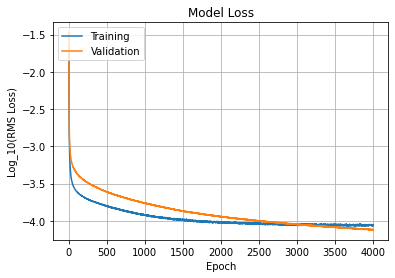

In [119]:
print(history.history.keys())
plt.plot(np.log10(history.history['val_loss']))
plt.plot(np.log10(history.history['loss']))
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Log_10(RMS Loss)')
#plt.ylabel('RMS Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

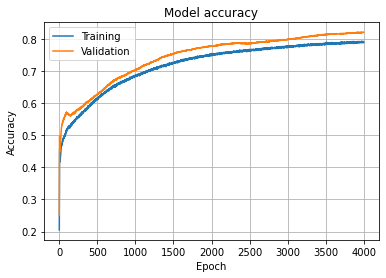

In [120]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training', 'Validation'], loc='upper left')

plt.show()

In [121]:
test_loss= model.evaluate(Batched_test_dataset)
print(test_loss)
#print(test_acc)

1/1 [==============================] - 0s 66ms/step - loss: 8.8552e-05 - accuracy: 0.8204
[8.855166379362345e-05, 0.8204166889190674]


In [118]:
#model.save_weights('SavedModels/V2/')
model.save("./SavedModels/MRN_ModelV3")

INFO:tensorflow:Assets written to: ./SavedModels/MRN_ModelV3\assets


In [12]:
DataToPredict = tf.convert_to_tensor([[0.5,0.4,0.3]])


predictions = model.predict(DataToPredict)

print(predictions)

1/1 [==============================] - 0s 25ms/step
[[0.24448968 0.22239828 0.2874853  0.25613907 0.29479817 0.24083339
  0.276609   0.28222325]]


dict_keys(['loss'])


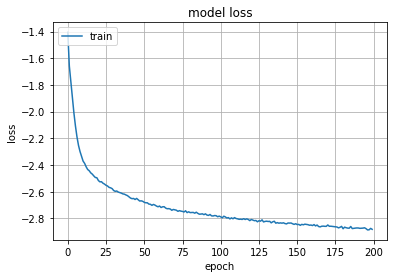

In [9]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
plt.plot(np.log10(history.history['loss']))

#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()